Dataset: Use the famous Iris dataset, which is available in many machine learning libraries. This dataset consists of 150 samples of iris flowers, each belonging to one of three species: setosa, versicolor, or virginica.

In [1]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual filename/path of your dataset
file_path = './dataset.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Display basic statistics about the dataset
print("\nDataset Statistics:")
print(df.describe())

# Display information about the dataset, including data types and missing values
print("\nDataset Information:")
print(df.info())


First few rows of the DataFrame:
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class

This code creates a pair plot to visualize relationships between features and a heatmap of the correlation matrix. Adjust the column names based on your actual dataset structure.

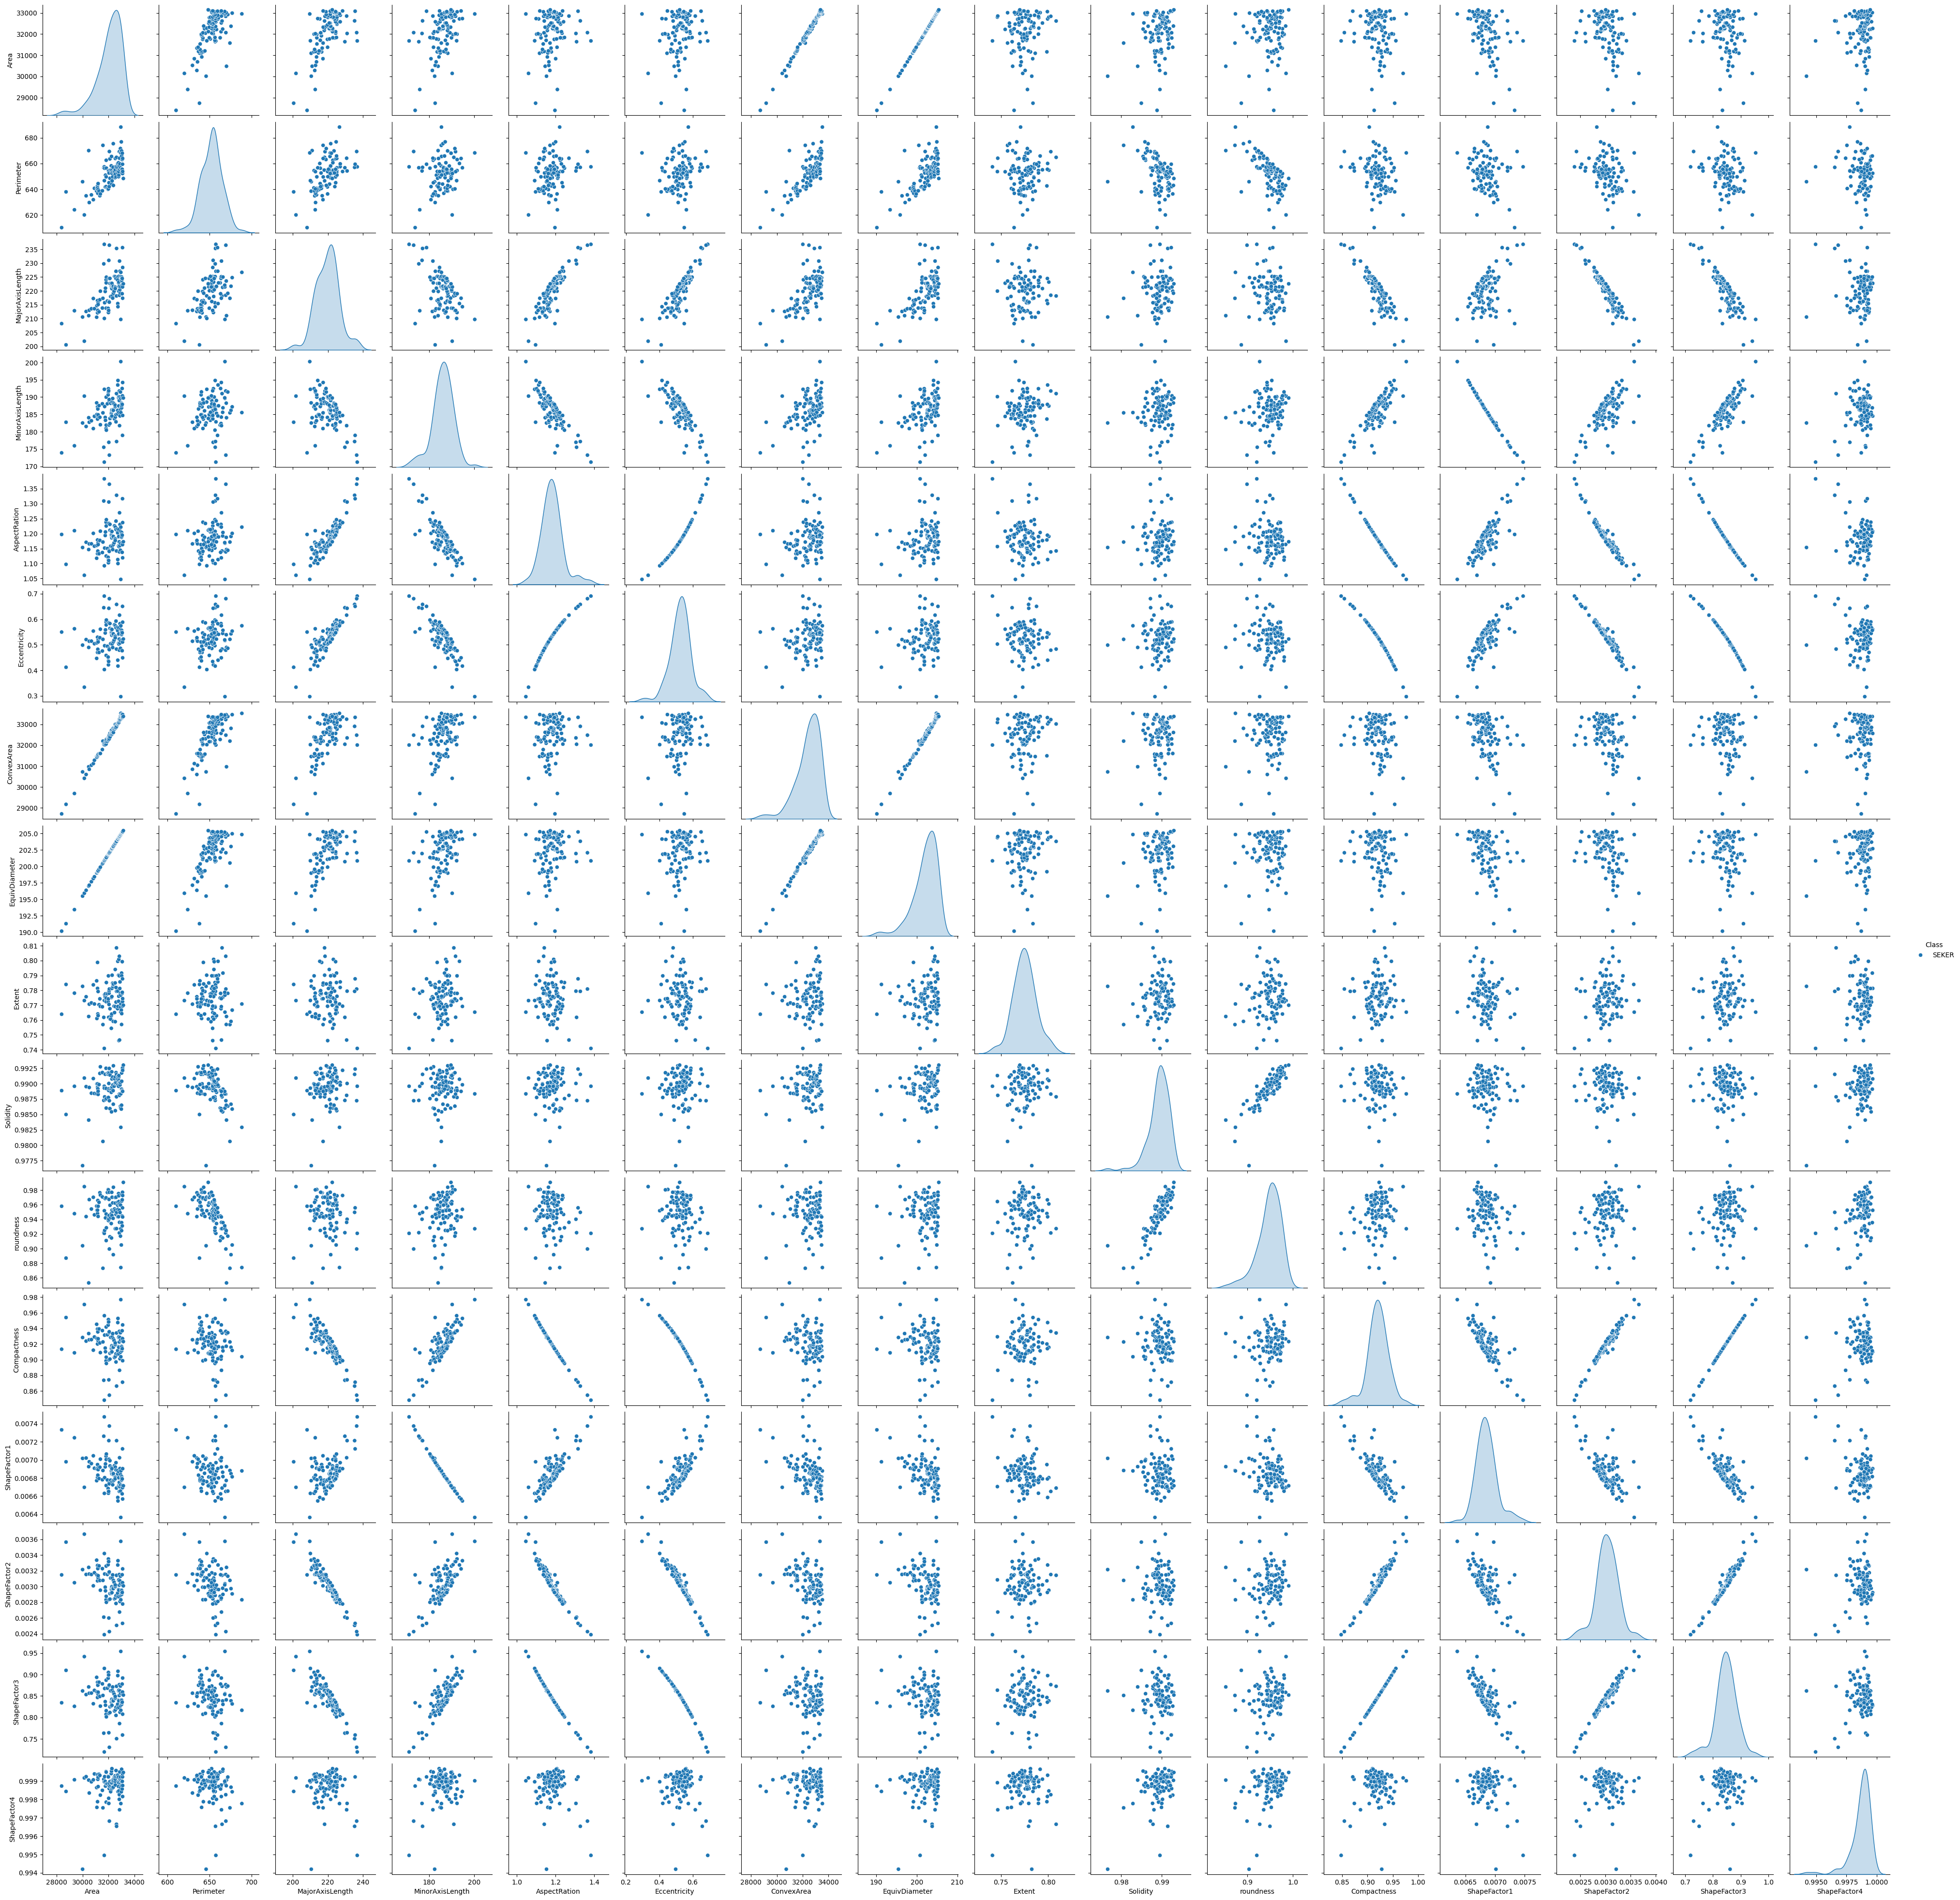

C:\Users\apple pro\AppData\Local\Temp\ipykernel_47196\1187400787.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


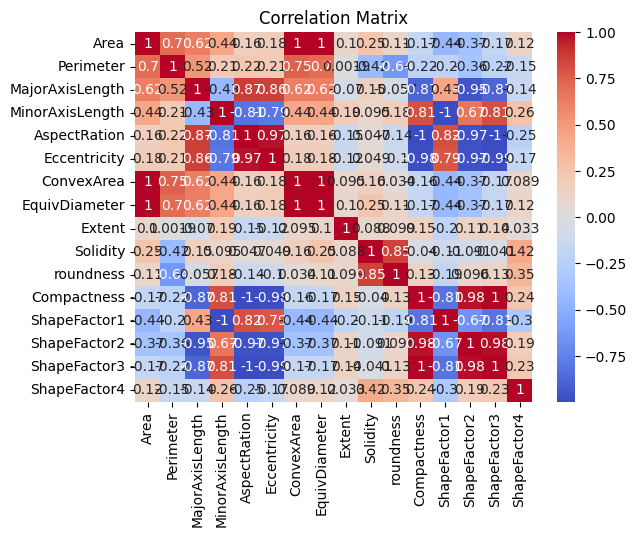

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

subset_df = df.head(100)

# Pair plot to visualize relationships between features
sns.pairplot(subset_df, hue='Class')  # Assuming 'class' is the column containing the class labels
plt.show()

# Correlation matrix heatmap
correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [3]:
import pandas as pd

def handle_missing_values(df):
    """
    Handle missing values in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - df_cleaned: DataFrame with missing values handled
    """

    # Display the count of missing values in each column
    print("Missing Values Before Handling:")
    print(df.isnull().sum())

    # Strategy 1: Drop rows with any missing values
    df_cleaned = df.dropna()

    # Strategy 2: Fill missing numeric values with the mean
    # You can customize this strategy based on your data
    df_cleaned = df_cleaned.fillna(df_cleaned.mean())

    # Display the count of missing values after handling
    print("\nMissing Values After Handling:")
    print(df_cleaned.isnull().sum())

    return df_cleaned

# Assuming 'your_dataset.csv' is the filename of your dataset
file_path = './dataset.xlsx'

# Read the Excel file into a DataFrame
original_df = pd.read_excel(file_path)

# Handle missing values
cleaned_df = handle_missing_values(original_df)


Missing Values Before Handling:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Missing Values After Handling:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


C:\Users\apple pro\AppData\Local\Temp\ipykernel_47196\1110864313.py:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned = df_cleaned.fillna(df_cleaned.mean())


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'cleaned_df' is your DataFrame
# Features (X) and target variable (y)
X = cleaned_df.drop("Class", axis=1)
y = cleaned_df["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Adjust the list of k values as needed

# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Create KNN classifier with the best k
knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

# Display results
print("Best k value:", best_k)
print("KNN Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create KNN classifier with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

# Display results
print("KNN Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

In [ ]:


# Assuming cleaned_df is your DataFrame and X_clustering is your features
# Change 'Cluster' to the actual column name if it's different
attributes = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
              'Eccentricity', 'ConvexArea','EquivDiameter', 'Extent', 'Solidity', 'roundness',
              'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

# Create scatter plots for each pair of attributes
for i in range(len(attributes)):
    for j in range(i + 1, len(attributes)):
        attribute1 = attributes[i]
        attribute2 = attributes[j]

        plt.scatter(X_clustering[attribute1], X_clustering[attribute2], c=cleaned_df['Cluster'], cmap='viridis', s=50)
        plt.title(f'K-Means Clustering - {attribute1} vs {attribute2}')
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.show()
